<a href="https://colab.research.google.com/github/YogaVicky/Brasil-Football-League-Data-Analysis/blob/main/CED18I058_ASBD_Lab_EndSem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **End Semester Lab Exam - CED18I058 - Yoga Sri Varshan V**

For the Given dataset, apply apt data pre-processing techniques 
to clean the data for further processing. Exploit the concepts discussed in 
Descriptive Statistics that relate to the data set to gain key insights 
from the data. Adopt a through exploratory data analytics approach, 
relating the various concepts and plots discussed in the course / tested in 
the lab assignments to gain key insights from the given data set. On the 
Pre-processing and EDA front adopt an exhaustive approach relating the 
maximum no of techniques / features under each set. Over the cleaned data 
set, apply the following algorithms.

Algorithm 1: FP-growth

Algorithm 2: Naive Bayes Classification or Regression

Algorithm 3: k-mediods Clustering

Dataset Name: (1) Brasil Soccer League Dataset

Dataset Link: 
https://www.kaggle.com/macedojleo/campeonato-brasileiro-2003-a-2019

General Instruction: You shall apply necessary pre-processing techniques 
like discretization, binning etc to make the dataset suitable for applying 
FIM algorithm. You may also make any valid assumptions required for the 
entire exercise and state them explicitly in your documents submitted. 
Submit a complete report describing the techniques employed, code snippets 
and corresponding output as done for your lab submissions or share the 
corresponding notebook link with all data present in the file do mention 
the dataset name in your answer script.
: Based on the type of the assigned dataset, you shall either consider the 
entire set of features (or) subset of features to generate frequent 
patterns and apply predictive analytics.

In [220]:
#Importing all the required libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split
from sklearn_extra.cluster import KMedoids
from sklearn.naive_bayes import GaussianNB

In [2]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 3.9 MB/s 


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Brasil_Football.csv to Brasil_Football.csv


### **Exploratory Data Analysis and Preprocessing - Brasil Football League data**

In [221]:
df=pd.read_csv('Brasil_Football.csv',delimiter=',')

In [222]:
df

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,Empate,Maracanã,NaN
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,Empate,Engenhão,NaN
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,Empate,Ressacada,NaN
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,Mandante,Serra Dourada,NaN


In [223]:
#Removed ID and OBS since they are of no use
df.drop(['Data','ID', 'OBS'], axis=1, inplace=True)

In [224]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6886 rows and 10 columns


In [225]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 500]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [226]:
#Renaming columns from Spanish to English
df.columns = ['Year','Round', 'Team 1', 'Team 2','Home Team Goals','Away Team Goals','Home Team State','Away Team State','Winning Team','Arena']

In [227]:
#Creating new columns - Total Goals scored in a match and Home/Away Win(Which team out of home/away won?)
df['Total Goals'] = df['Home Team Goals'] + df['Away Team Goals']
df['Total Goals'] = df['Total Goals'].astype(str)
df['Home/Away Win'] = df['Winning Team']

In [253]:
#Changing the values of the winning team to the respective names of team 1/team 2/draw from Spnish to English
df.loc[df["Home/Away Win"] == "Mandante", "Home/Away Win"] = "Home"
df.loc[df["Home/Away Win"] == "Visitante", "Home/Away Win"] = "Away"
df.loc[df["Home/Away Win"] == "Empate", "Home/Away Win"] = "Draw"
df.loc[df["Winning Team"] == "Mandante", "Winning Team"] = df["Team 1"]
df.loc[df["Winning Team"] == "Visitante", "Winning Team"] = df["Team 2"]
df.loc[df["Winning Team"] == "Empate", "Winning Team"] = "Draw"

In [229]:
#Final Dataset ready for EDA
df

,Year,Round,Team 1,Team 2,Home Team Goals,Away Team Goals,Home Team State,Away Team State,Winning Team,Arena,Total Goals,Home/Away Win
0,2003,1,Guarani,Vasco,4,2,SP,RJ,Guarani,Brinco de Ouro,6,Home
1,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Athletico-PR,Arena da Baixada,2,Home
2,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Draw,Maracanã,2,Draw
3,2003,1,Goiás,Paysandu,2,2,GO,PA,Draw,Serra Dourada,4,Draw
4,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Draw,Beira-Rio,2,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019,38,Vasco,Chapecoense,1,1,RJ,SC,Draw,Maracanã,2,Draw
6882,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,Draw,Engenhão,2,Draw
6883,2019,38,Avaí,Athletico-PR,0,0,SC,PR,Draw,Ressacada,0,Draw
6884,2019,38,Goiás,Grêmio,3,2,GO,RS,Goiás,Serra Dourada,5,Home


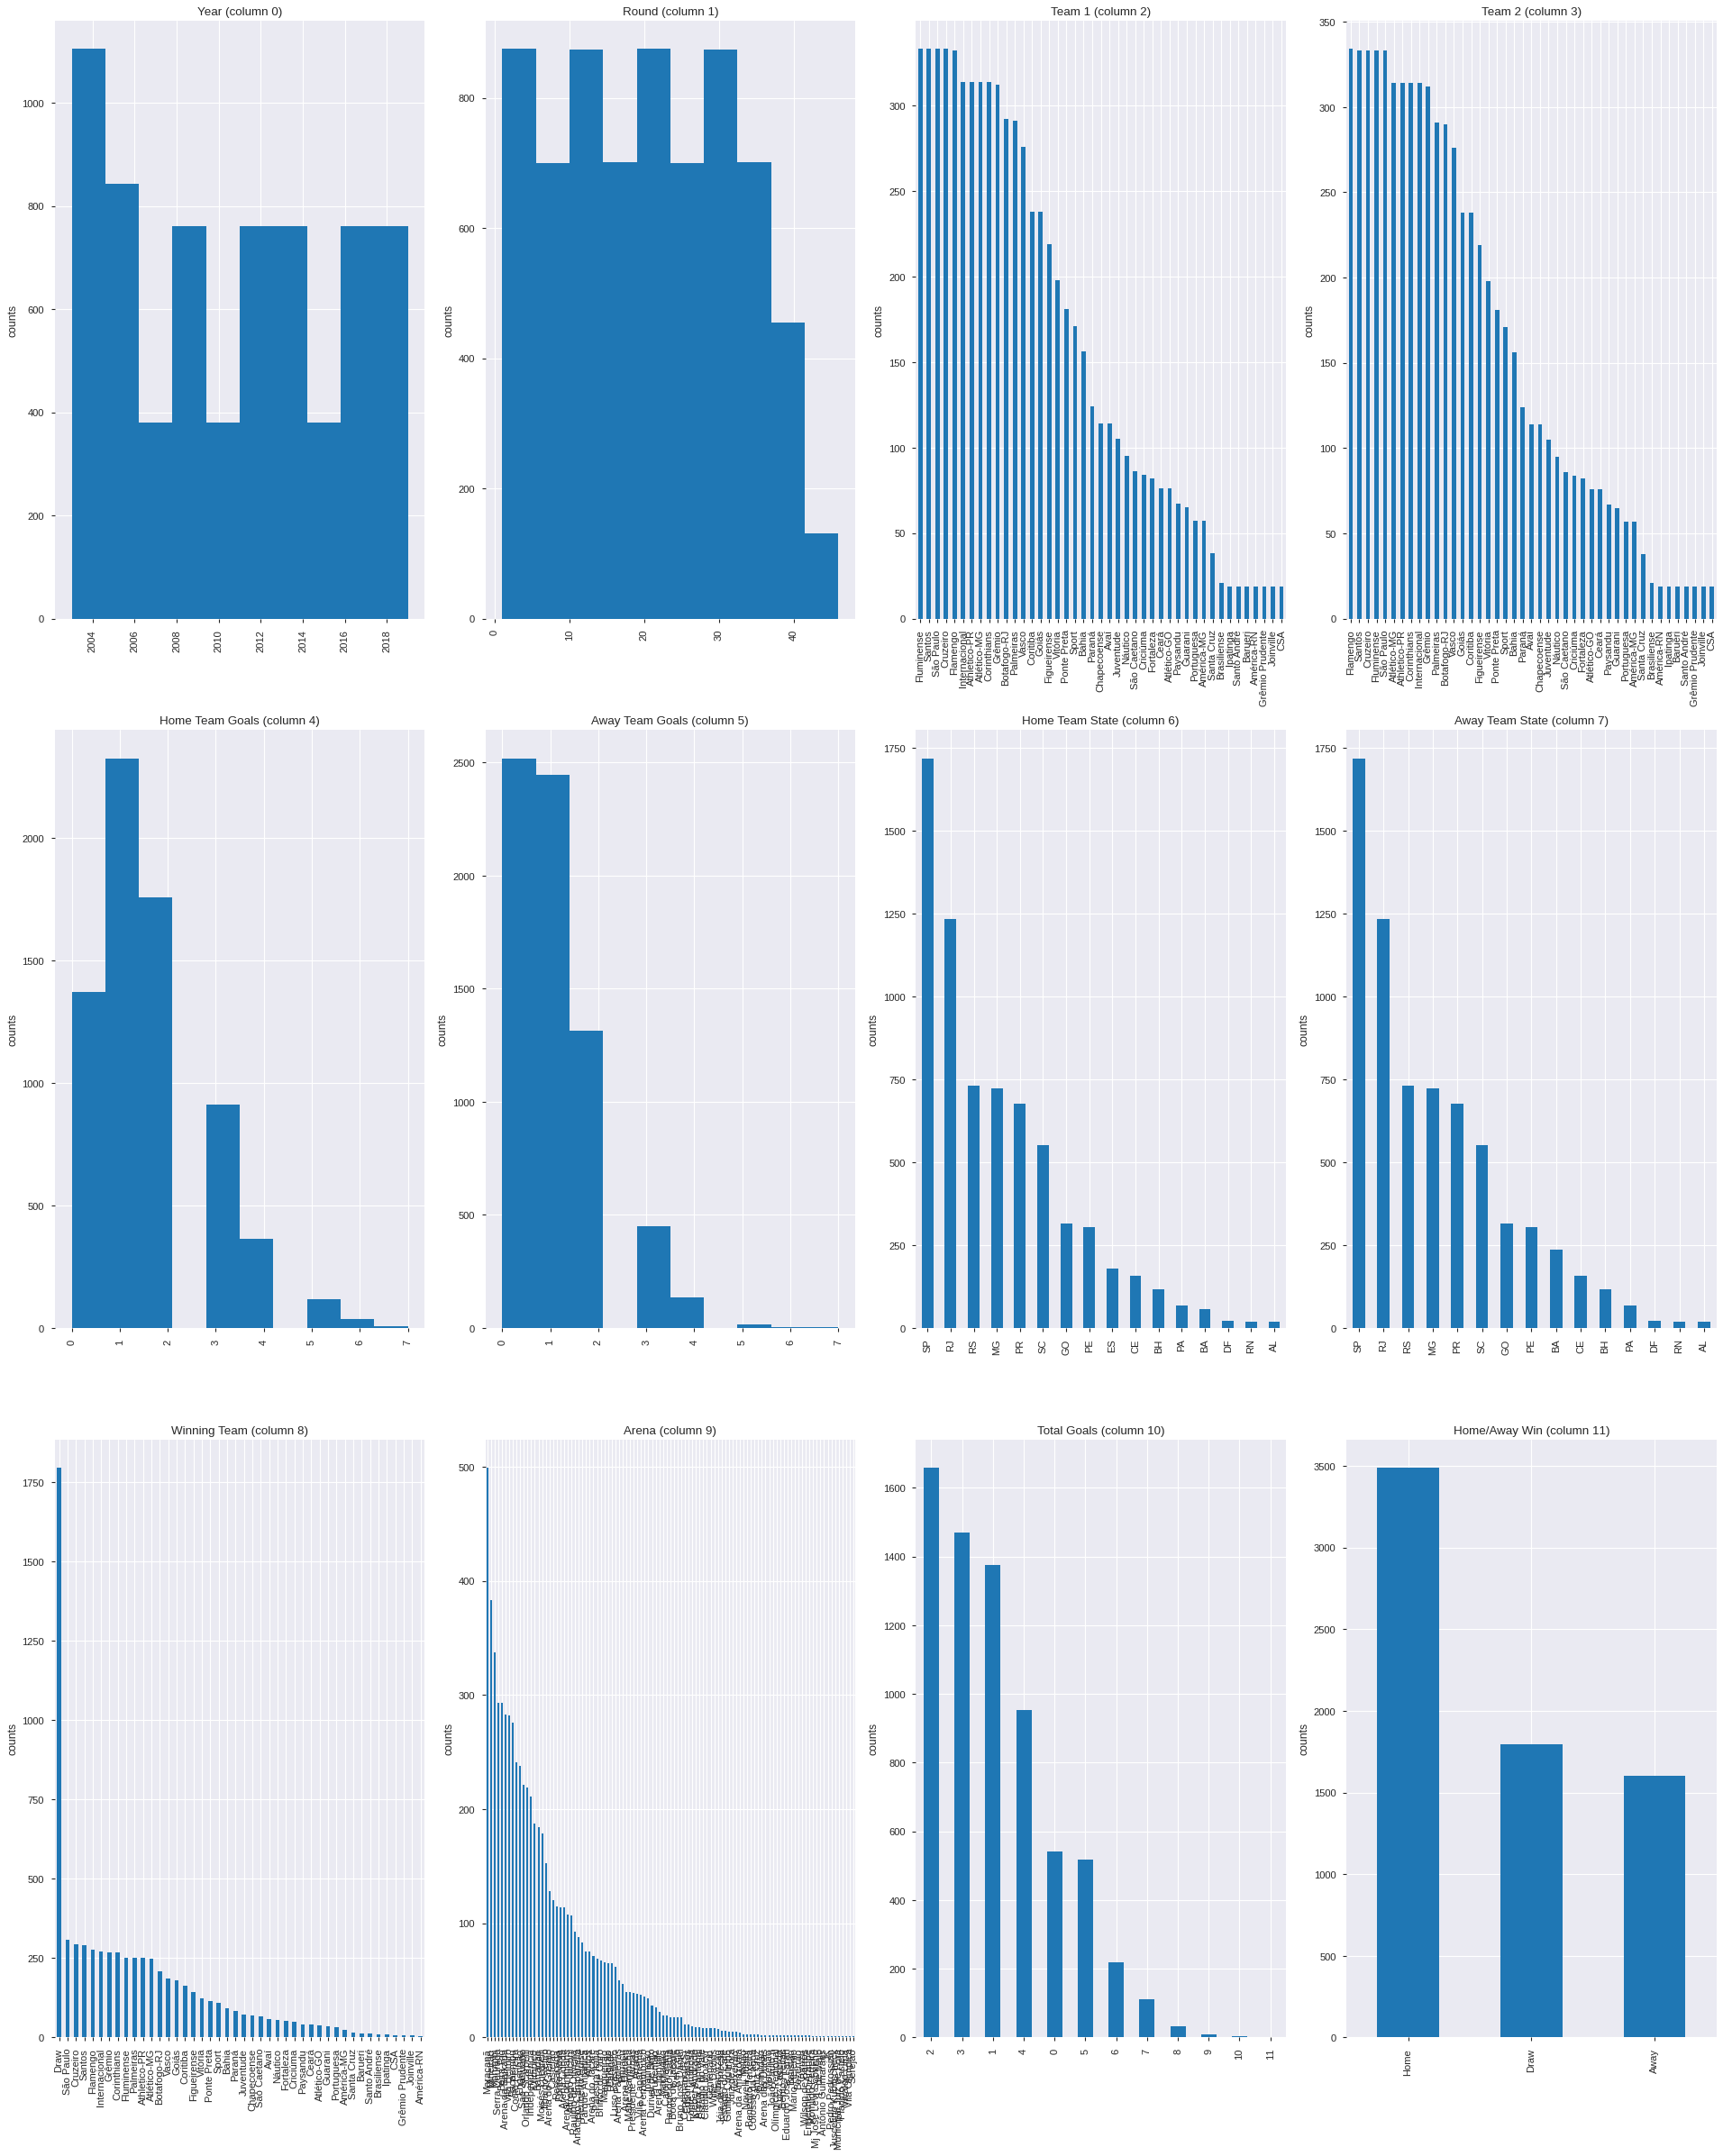

In [230]:
#Plot per column distribution
plotPerColumnDistribution(df,14,4)

In [254]:
#Column wise information about the dataset
df.info()
for col in df.columns:
    print(len(df[col].unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6886 entries, 0 to 6885
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             6886 non-null   int64 
 1   Round            6886 non-null   int64 
 2   Team 1           6886 non-null   object
 3   Team 2           6886 non-null   object
 4   Home Team Goals  6886 non-null   int64 
 5   Away Team Goals  6886 non-null   int64 
 6   Home Team State  6886 non-null   object
 7   Away Team State  6886 non-null   object
 8   Winning Team     6886 non-null   object
 9   Arena            6886 non-null   object
 10  Total Goals      6886 non-null   object
 11  Home/Away Win    6886 non-null   object
dtypes: int64(4), object(8)
memory usage: 699.4+ KB
17
46
43
43
8
8
16
15
44
101
12
3


In [232]:
#Remove Duplicates
df.duplicated()
df.drop_duplicates()

,Year,Round,Team 1,Team 2,Home Team Goals,Away Team Goals,Home Team State,Away Team State,Winning Team,Arena,Total Goals,Home/Away Win
0,2003,1,Guarani,Vasco,4,2,SP,RJ,Guarani,Brinco de Ouro,6,Home
1,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Athletico-PR,Arena da Baixada,2,Home
2,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Draw,Maracanã,2,Draw
3,2003,1,Goiás,Paysandu,2,2,GO,PA,Draw,Serra Dourada,4,Draw
4,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Draw,Beira-Rio,2,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019,38,Vasco,Chapecoense,1,1,RJ,SC,Draw,Maracanã,2,Draw
6882,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,Draw,Engenhão,2,Draw
6883,2019,38,Avaí,Athletico-PR,0,0,SC,PR,Draw,Ressacada,0,Draw
6884,2019,38,Goiás,Grêmio,3,2,GO,RS,Goiás,Serra Dourada,5,Home


In [233]:
#Drop Null Rows
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


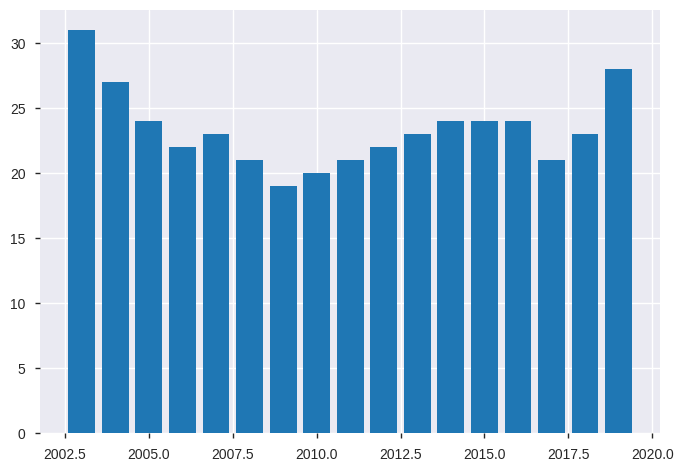

In [256]:
#Year Wise highest number of wins
year = df['Year'].unique()
dict ={}
cnt = []
for yr in year:
  df_temp = df[df['Year'] == yr]
  df_temp.drop(df_temp[df_temp['Winning Team'] == 'Draw'].index, inplace = True)
  temp=0
  # print(df['Winning Team'].value_counts())
  temp = df_temp['Winning Team'].value_counts().idxmax()
  # print(temp)
  temp2 = df_temp['Winning Team'].value_counts()[0]
  teams = df['Winning Team'].unique()
  temp3=[]
  temp3.append(temp)
  temp3.append(temp2)
  dict[yr] = temp3
  cnt.append(temp2)
plt.bar(year, cnt)
plt.show()

{}


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<function matplotlib.pyplot.show>

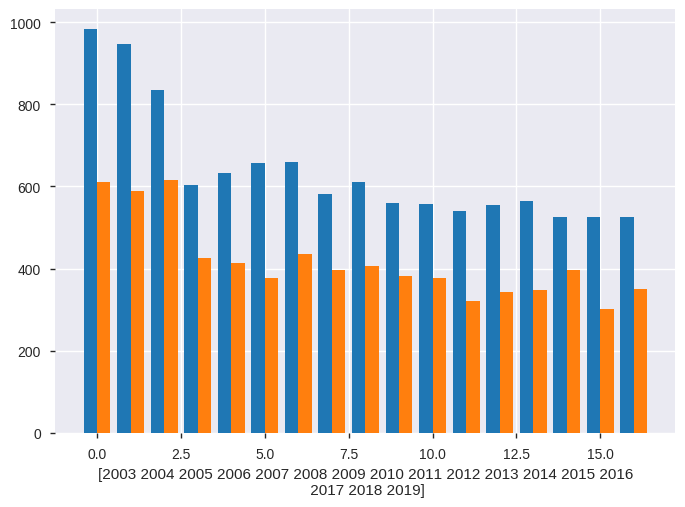

In [257]:
#No of Goals - Home and Away by Year
year = df['Year'].unique()
dict ={}
temp3=[]
temp4=[]
for yr in year:
  df_temp = df[df['Year'] == yr]
  temp1 = df_temp['Home Team Goals'].sum()
  temp2 = df_temp['Away Team Goals'].sum()
  temp3.append(temp1)
  temp4.append(temp2)
print(dict)
X_axis = np.arange(len(year))
plt.bar(X_axis - 0.2, temp3, 0.4, label = 'Home Team Goals')
plt.bar(X_axis + 0.2, temp4, 0.4, label = 'Away Team Goals')
plt.xlabel(year)
plt.show

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


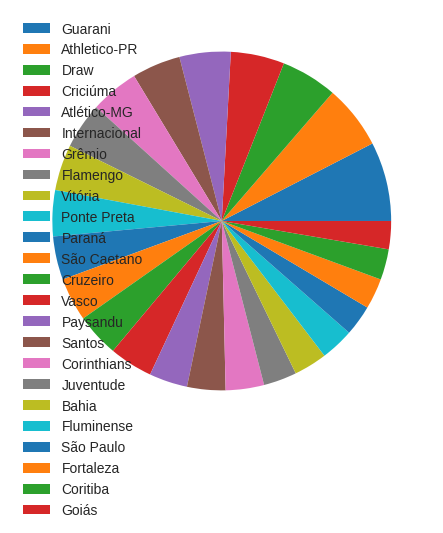

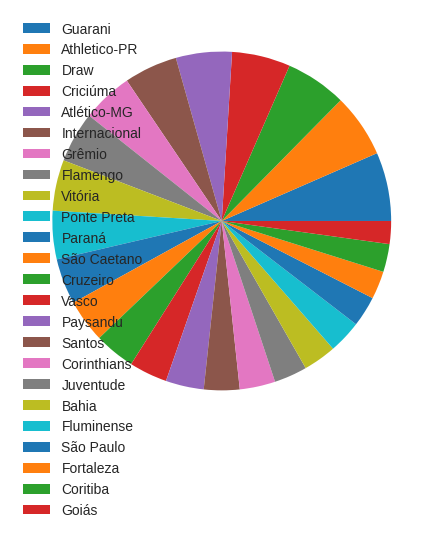

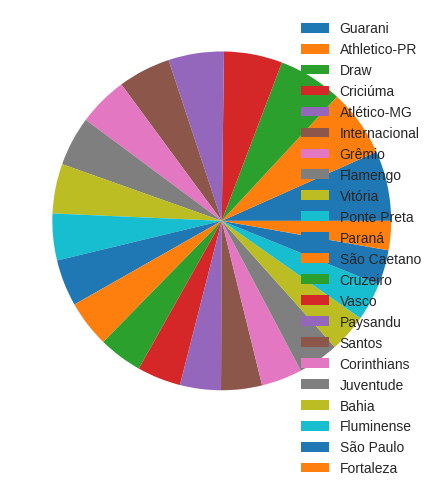

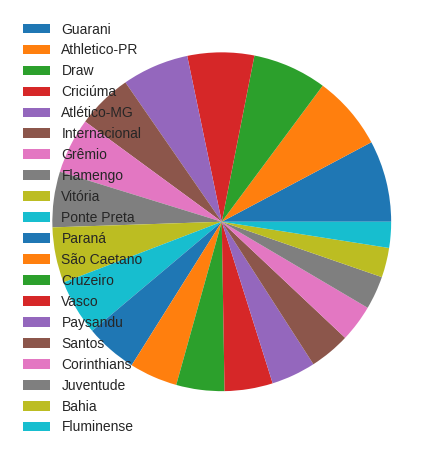

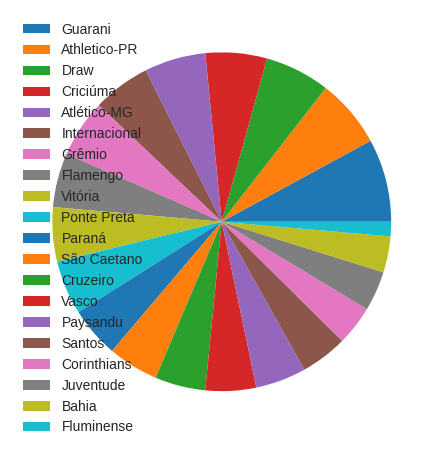

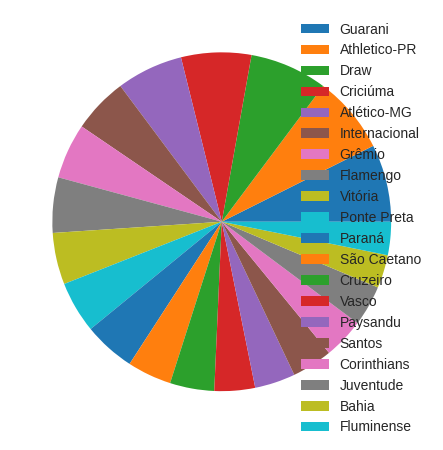

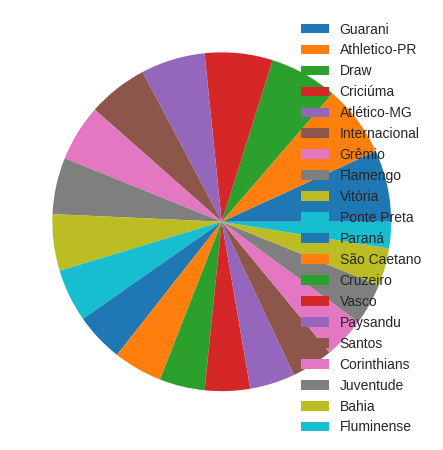

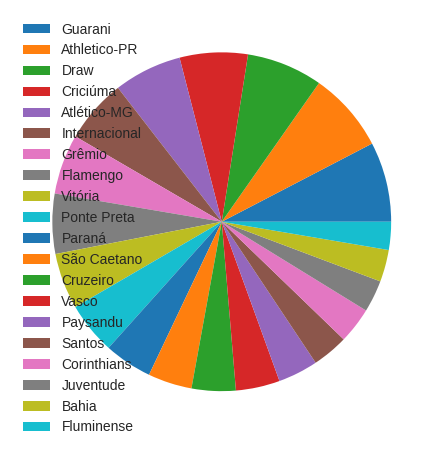

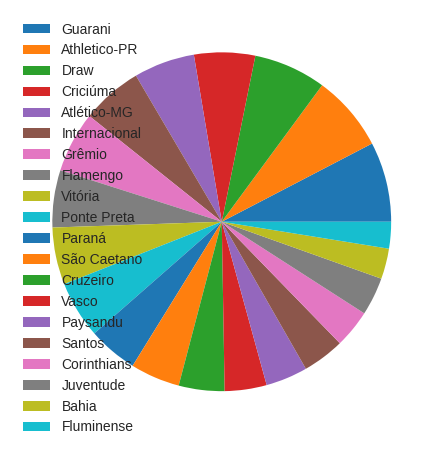

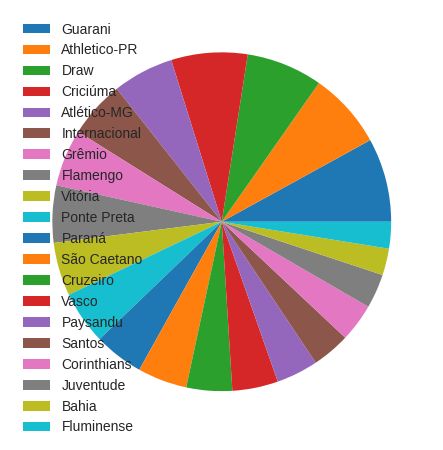

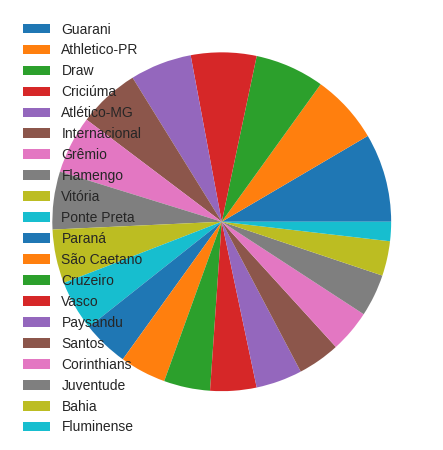

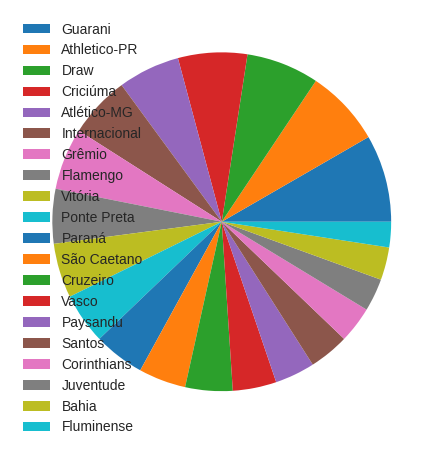

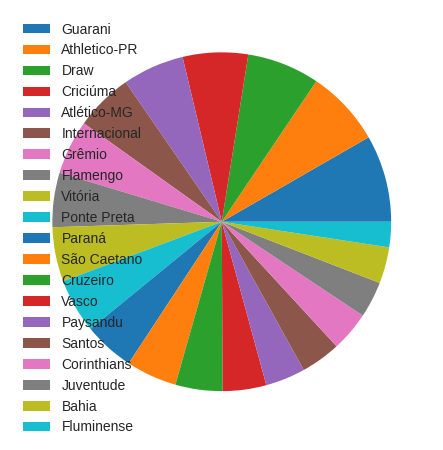

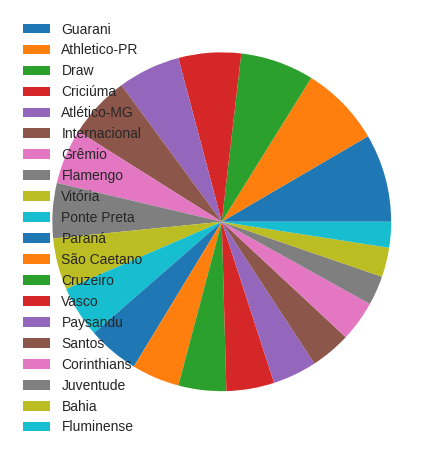

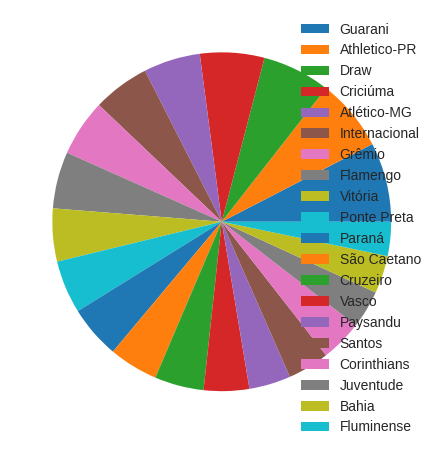

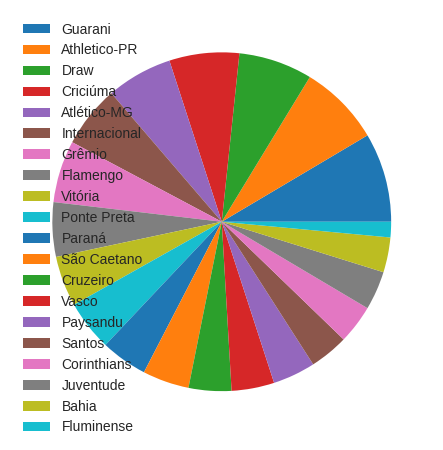

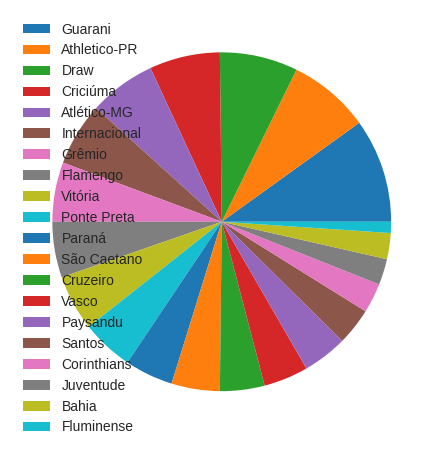

In [258]:
#Number of wins of every team every Year from 2003 to 2019
year = df['Year'].unique()
dict ={}
for yr in year:
  df_temp = df[df['Year'] == yr]
  df_temp.drop(df_temp[df_temp['Winning Team'] == 'Draw'].index, inplace = True)
  cnt = df_temp['Winning Team'].value_counts()
  teams = df['Winning Team'].unique()
  plt.pie(cnt)
  plt.legend(teams)
  plt.show() 

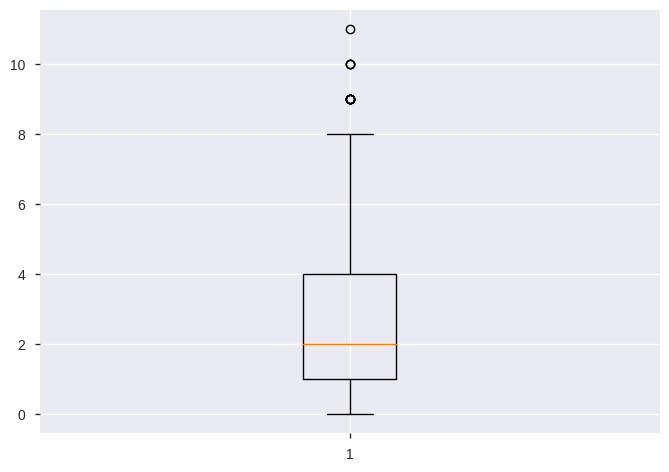

In [259]:
#Box plots to find outliers in matches regards to Total Goals scored in a match
TotalGoals = df['Total Goals'].to_numpy().astype(int)
plt.boxplot(TotalGoals)
plt.show()

### **FP Growth**

In [260]:
#The attributes used are Team 1,Team 2,Winning Team,Arena and Total Goals.
#The frequent patterns occuring in the dataset containing these attributes specifically is found using FP Growth Algorithm.
df_fp = df.filter(['Team 1','Team 2','Winning Team','Arena','Total Goals'], axis=1)
df_fp

,Team 1,Team 2,Winning Team,Arena,Total Goals
0,Guarani,Vasco,Guarani,Brinco de Ouro,6
1,Athletico-PR,Grêmio,Athletico-PR,Arena da Baixada,2
2,Flamengo,Coritiba,Draw,Maracanã,2
3,Goiás,Paysandu,Draw,Serra Dourada,4
4,Internacional,Ponte Preta,Draw,Beira-Rio,2
...,...,...,...,...,...
6881,Vasco,Chapecoense,Draw,Maracanã,2
6882,Botafogo-RJ,Ceará,Draw,Engenhão,2
6883,Avaí,Athletico-PR,Draw,Ressacada,0
6884,Goiás,Grêmio,Goiás,Serra Dourada,5


In [261]:
transactions=df_fp.values.tolist()

In [262]:
#The set of Transactions on which FP Grwoth will be implemented
transactions

[['Guarani', 'Vasco', 'Guarani', 'Brinco de Ouro', '6'],
 ['Athletico-PR', 'Grêmio', 'Athletico-PR', 'Arena da Baixada', '2'],
 ['Flamengo', 'Coritiba', 'Draw', 'Maracanã', '2'],
 ['Goiás', 'Paysandu', 'Draw', 'Serra Dourada', '4'],
 ['Internacional', 'Ponte Preta', 'Draw', 'Beira-Rio', '2'],
 ['Criciúma', 'Fluminense', 'Criciúma', 'Heriberto Hulse', '2'],
 ['Juventude', 'São Paulo', 'Draw', 'Alfredo Jaconi', '4'],
 ['Fortaleza', 'Bahia', 'Draw', 'Castelão', '0'],
 ['Cruzeiro', 'São Caetano', 'Draw', 'Mineirão', '4'],
 ['Vitória', 'Figueirense', 'Draw', 'Barradão', '2'],
 ['Santos', 'Paraná', 'Draw', 'Vila Belmiro', '4'],
 ['Corinthians', 'Atlético-MG', 'Atlético-MG', 'Pacaembu', '3'],
 ['Fluminense', 'Fortaleza', 'Draw', 'Maracanã', '2'],
 ['Atlético-MG', 'Santos', 'Draw', 'Mineirão', '0'],
 ['Coritiba', 'Internacional', 'Internacional', 'Couto Pereira', '1'],
 ['Grêmio', 'Guarani', 'Grêmio', 'Olímpico', '4'],
 ['Bahia', 'Flamengo', 'Flamengo', 'Fonte Nova', '3'],
 ['Figueirense', 'Co

In [263]:
TE = TransactionEncoder()
TE_records = TE.fit(transactions).transform(transactions)
trans_df = pd.DataFrame(TE_records, columns=TE.columns_)
trans_df

,0,1,10,11,1º de Maio,2,3,4,5,6,...,São Paulo,Teixeirão,Vasco,Vila Belmiro,Vila Capanema,Vila Olímpica,Vitória,Vivaldo Lima,Willie Davids,Wilson de Barros
0,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6882,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6883,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6884,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [264]:
#For every min support count,the frequent item sets are generated till we reach empty set by increasing the Support count.
min_support=0.0025
while(1):
    min_support*=2
    freq_items=fpgrowth(trans_df, min_support=min_support, use_colnames=True)

    if(min_support>1.30 or len(freq_items)==0):
        if(len(freq_items)==0):
            print("\n Current Min_Support = "+str(min_support)+" generates no frequent itemset,Null Set is Reached")
            break
    print("\n Frequent Itemset with Min_Support of "+str(min_support)+"\n",freq_items)


 Frequent Itemset with Min_Support of 0.005
       support                          itemsets
0    0.080163                           (Vasco)
1    0.031804                               (6)
2    0.018879                         (Guarani)
3    0.009730                  (Brinco de Ouro)
4    0.240778                               (2)
..        ...                               ...
508  0.008278                  (Chapecoense, 1)
509  0.008423                  (Chapecoense, 2)
510  0.016555        (Arena Condá, Chapecoense)
511  0.015684  (Arena Corinthians, Corinthians)
512  0.007261      (Arena Palmeiras, Palmeiras)

[513 rows x 2 columns]

 Frequent Itemset with Min_Support of 0.01
       support                          itemsets
0    0.080163                           (Vasco)
1    0.031804                               (6)
2    0.018879                         (Guarani)
3    0.240778                               (2)
4    0.091200                    (Athletico-PR)
..        ...        

### **Naive Bayes Classifier**

In [265]:
# The attributes used are Team 1,Team 2,Home Team Goals,Home/Away Win,Away Team Goals,Arena.
# Whether a home team will win or an away team will win or will it result in a draw will be classified by the Naive Bayes Classifier.
# Here the classified result is the Home/Away Win(Which team out of home and away teams win the match).
df_nb = df.filter(['Team 1','Team 2','Home Team Goals','Home/Away Win','Away Team Goals','Arena'], axis=1)
df_nb

,Team 1,Team 2,Home Team Goals,Home/Away Win,Away Team Goals,Arena
0,Guarani,Vasco,4,Home,2,Brinco de Ouro
1,Athletico-PR,Grêmio,2,Home,0,Arena da Baixada
2,Flamengo,Coritiba,1,Draw,1,Maracanã
3,Goiás,Paysandu,2,Draw,2,Serra Dourada
4,Internacional,Ponte Preta,1,Draw,1,Beira-Rio
...,...,...,...,...,...,...
6881,Vasco,Chapecoense,1,Draw,1,Maracanã
6882,Botafogo-RJ,Ceará,1,Draw,1,Engenhão
6883,Avaí,Athletico-PR,0,Draw,0,Ressacada
6884,Goiás,Grêmio,3,Home,2,Serra Dourada


In [266]:
# The data is converted into categorical data
columns = ['Team 1','Team 2','Away Team Goals','Home/Away Win','Home Team Goals','Arena']
for col in columns:
  df_nb[col]=df_nb[col].astype('category')
  df_nb[col]=df_nb[col].cat.codes

In [267]:
Train_X = df_nb.filter(['Team 1','Team 2','Away Team Goals','Home Team Goals','Arena'],axis=1).values
Train_Y = df_nb.filter(['Home/Away Win'],axis=1).values

In [268]:
# Train and Test data are split
train_x,test_x,train_y,test_y = train_test_split(Train_X,Train_Y, test_size = 0.2, random_state=42)

In [269]:
# Naive Bayes classifier initialised
gnb = GaussianNB()

In [270]:
# A small EDA about the dataset we have for Bayes classifier
df_nb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6886 entries, 0 to 6885
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Team 1           6886 non-null   int8 
 1   Team 2           6886 non-null   int8 
 2   Home Team Goals  6886 non-null   int8 
 3   Home/Away Win    6886 non-null   int8 
 4   Away Team Goals  6886 non-null   int8 
 5   Arena            6886 non-null   int8 
dtypes: int8(6)
memory usage: 94.1 KB


In [271]:
train_x

array([[32, 18,  2,  2, 59],
       [18, 20,  0,  2, 40],
       [15, 16,  2,  1, 46],
       ...,
       [14, 25,  1,  0, 34],
       [14, 40,  1,  1, 34],
       [21, 33,  0,  5, 92]], dtype=int8)

In [272]:
train_y=train_y.reshape(5508)

In [273]:
train_y

array([1, 2, 0, ..., 0, 1, 2], dtype=int8)

In [274]:
gnb.fit(train_x,train_y)

GaussianNB()

In [275]:
test_y=test_y.reshape(1378)

In [276]:
test_pred=(gnb.predict(test_x))

In [277]:
# Accuracy of the classifier
NB_Result=accuracy_score(test_y,test_pred)
print(NB_Result)

0.9013062409288825


In [279]:
# Recall of the classifier
from sklearn.metrics import recall_score
recall = recall_score(test_y,test_pred, average=None)
print(recall)

[0.66066066 0.93274854 1.        ]


In [280]:
# Precision of the classifier
from sklearn.metrics import precision_score
precision = precision_score(test_y,test_pred, average=None)
print(precision)

[0.99547511 0.73842593 0.96965517]


### **K-mediods Clustering**

In [289]:
# The attributes used are Year,Team 1,Team 2,Home Team Goals
df1 = df
df_kc = df1.filter(['Year','Team 1','Team 2','Home Team Goals'])
df_kc
#df_kc is our dataset for the K-mediods Clustering

,Year,Team 1,Team 2,Home Team Goals
0,2003,Guarani,Vasco,4
1,2003,Athletico-PR,Grêmio,2
2,2003,Flamengo,Coritiba,1
3,2003,Goiás,Paysandu,2
4,2003,Internacional,Ponte Preta,1
...,...,...,...,...
6881,2019,Vasco,Chapecoense,1
6882,2019,Botafogo-RJ,Ceará,1
6883,2019,Avaí,Athletico-PR,0
6884,2019,Goiás,Grêmio,3


In [290]:
# Categorizing the data entries
columns = ['Year','Team 1','Team 2','Home Team Goals']
for col in columns:
  df_kc[col]=df_kc[col].astype('category')
  df_kc[col]=df_kc[col].cat.codes

In [291]:
# Final df_kc
df_kc

,Year,Team 1,Team 2,Home Team Goals
0,0,24,41,4
1,0,2,22,2
2,0,18,14,1
3,0,21,32,2
4,0,25,33,1
...,...,...,...,...
6881,16,41,12,1
6882,16,8,11,1
6883,16,5,2,0
6884,16,21,22,3


In [292]:
data = df_kc.values

In [293]:
np.array(data)
X = np.asarray(data)
print(X)
X.shape

[[ 0 24 41  4]
 [ 0  2 22  2]
 [ 0 18 14  1]
 ...
 [16  5  2  0]
 [16 21 22  3]
 [16 10 40  1]]


(6886, 4)

In [312]:
# K-Mediods constant of 4 clusters initialised
kmedoids = KMedoids(n_clusters=4, random_state=42).fit(X)

In [313]:
# Kmed_pred is the result of our clustering
Kmed_pred=kmedoids.fit_predict(X)

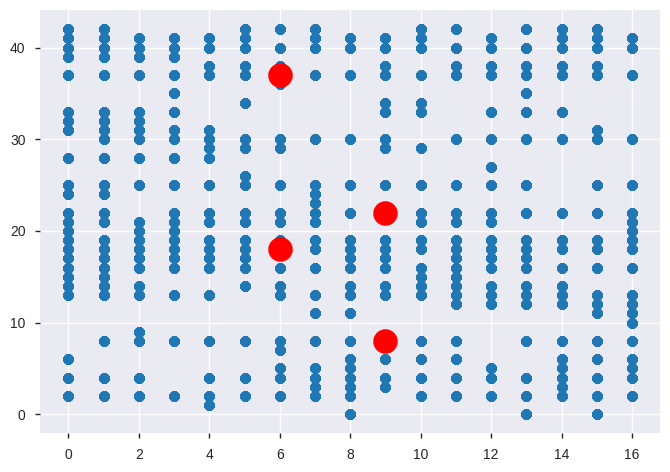

In [314]:
# A bit of graph plotting of the clusters
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [315]:
Y = kmedoids.labels_

In [316]:
# Printing the first 100 labels
print(Y[0:100])

[3 1 0 3 3 1 3 0 3 2 2 0 1 3 1 3 1 0 3 2 0 2 2 2 3 0 2 1 3 2 3 3 2 3 3 3 1
 1 3 1 0 2 2 2 1 3 2 2 1 2 3 2 0 1 3 0 2 1 3 1 1 0 2 0 1 3 3 2 0 1 3 2 3 1
 0 0 2 2 2 0 2 3 3 3 0 2 3 1 2 2 3 2 3 1 3 0 0 2 3 3]


## **Conclusion**

In [317]:
# The Dataset was subjected to the following:
# 1.Removing the outliers
# 2.Removing duplicates and Null values
# 3.Adding of New columns to better make sense of the data - Columns added - Home/Away Win,Total Goals
# 4.Changing all Spanish to English!!
# 5.Carrying extensive EDA on the dataset to make great sense and feel of the data in hand.
# 6.FP Growth to understand the frequently occuring patterns.
# 7.Naive Bayes Classifier to predict whether home team will win or away team will win.
# 8.K Mediods Clustering on the dataset and effective graph plots

## **Thank You!**